In [21]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('default')

from sklearn.preprocessing import LabelEncoder

In [4]:
df=pd.read_csv("Sleep_Efficiency.csv")
df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,25,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,21,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,30,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,70,10,3.0,0.0,0.0,No,3.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     436 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [10]:
df.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,436.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,23.002212,52.960177,24.831858,1.641204,23.653396,1.245413,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.972466,15.561713,15.150774,1.356762,30.202785,1.643336,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,20.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,51.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,60.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,27.000000,63.000000,27.250000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,56.000000,4.000000,200.000000,5.000000,5.000000


In [11]:
print("Number of missing values")
nan_val_count = df.isnull().sum()
print(nan_val_count, "\n")

Number of missing values
ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       16
Smoking status             0
Exercise frequency         6
dtype: int64 



In [16]:
df['Awakenings'].fillna(df['Awakenings'].mean() ,inplace=True)
df['Caffeine consumption'].fillna(df['Caffeine consumption'].mean() ,inplace=True)
df['Alcohol consumption'].fillna(df['Alcohol consumption'].mean() ,inplace=True)
df['Exercise frequency'].fillna(df['Exercise frequency'].mean() ,inplace=True)

df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

In [17]:
df.drop(["ID"],axis=1,inplace=True)

In [19]:
for col in ['Bedtime','Wakeup time'] :
    df[col] = pd.to_datetime(df[col], format="%Y-%m-%d %H:%M:%S")
    df[col] = df[col].dt.strftime('%H:%M')

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,Female,01:00,07:00,6.0,0.88,18,70,10,0.0,0.000000,0.0,Yes,3.0
1,69,Male,02:00,09:00,7.0,0.66,24,28,53,3.0,0.000000,3.0,Yes,3.0
2,40,Female,21:30,05:30,8.0,0.89,20,70,10,1.0,0.000000,0.0,No,3.0
3,40,Female,02:30,08:30,6.0,0.51,28,25,52,3.0,50.000000,5.0,Yes,1.0
4,57,Male,01:00,09:00,8.0,0.76,27,55,18,3.0,0.000000,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,Female,22:00,05:30,7.5,0.91,25,57,21,0.0,0.000000,0.0,No,5.0
448,52,Male,21:00,03:00,6.0,0.74,28,57,21,4.0,25.000000,0.0,No,3.0
449,40,Female,23:00,07:30,8.5,0.55,20,30,48,1.0,23.653396,3.0,Yes,0.0
450,45,Male,21:00,04:00,7.0,0.76,18,70,10,3.0,0.000000,0.0,No,3.0


In [20]:
df

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,Female,01:00,07:00,6.0,0.88,18,70,10,0.0,0.000000,0.0,Yes,3.0
1,69,Male,02:00,09:00,7.0,0.66,24,28,53,3.0,0.000000,3.0,Yes,3.0
2,40,Female,21:30,05:30,8.0,0.89,20,70,10,1.0,0.000000,0.0,No,3.0
3,40,Female,02:30,08:30,6.0,0.51,28,25,52,3.0,50.000000,5.0,Yes,1.0
4,57,Male,01:00,09:00,8.0,0.76,27,55,18,3.0,0.000000,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,Female,22:00,05:30,7.5,0.91,25,57,21,0.0,0.000000,0.0,No,5.0
448,52,Male,21:00,03:00,6.0,0.74,28,57,21,4.0,25.000000,0.0,No,3.0
449,40,Female,23:00,07:30,8.5,0.55,20,30,48,1.0,23.653396,3.0,Yes,0.0
450,45,Male,21:00,04:00,7.0,0.76,18,70,10,3.0,0.000000,0.0,No,3.0


In [22]:
le=LabelEncoder()

df['Gender']= le.fit_transform(df['Gender'].astype(str))
df['Smoking status']= le.fit_transform(df['Smoking status'].astype(str))
df['Bedtime']= le.fit_transform(df['Bedtime'].astype(str))
df['Wakeup time']= le.fit_transform(df['Wakeup time'].astype(str))
df['Sleep duration']= le.fit_transform(df['Sleep duration'].astype(str))

In [23]:
df

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,0,2,8,3,0.88,18,70,10,0.0,0.000000,0.0,1,3.0
1,69,1,4,12,4,0.66,24,28,53,3.0,0.000000,3.0,1,3.0
2,40,0,7,5,6,0.89,20,70,10,1.0,0.000000,0.0,0,3.0
3,40,0,5,11,3,0.51,28,25,52,3.0,50.000000,5.0,1,1.0
4,57,1,2,12,6,0.76,27,55,18,3.0,0.000000,3.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,0,8,5,5,0.91,25,57,21,0.0,0.000000,0.0,0,5.0
448,52,1,6,0,3,0.74,28,57,21,4.0,25.000000,0.0,0,3.0
449,40,0,10,9,7,0.55,20,30,48,1.0,23.653396,3.0,1,0.0
450,45,1,6,2,4,0.76,18,70,10,3.0,0.000000,0.0,0,3.0


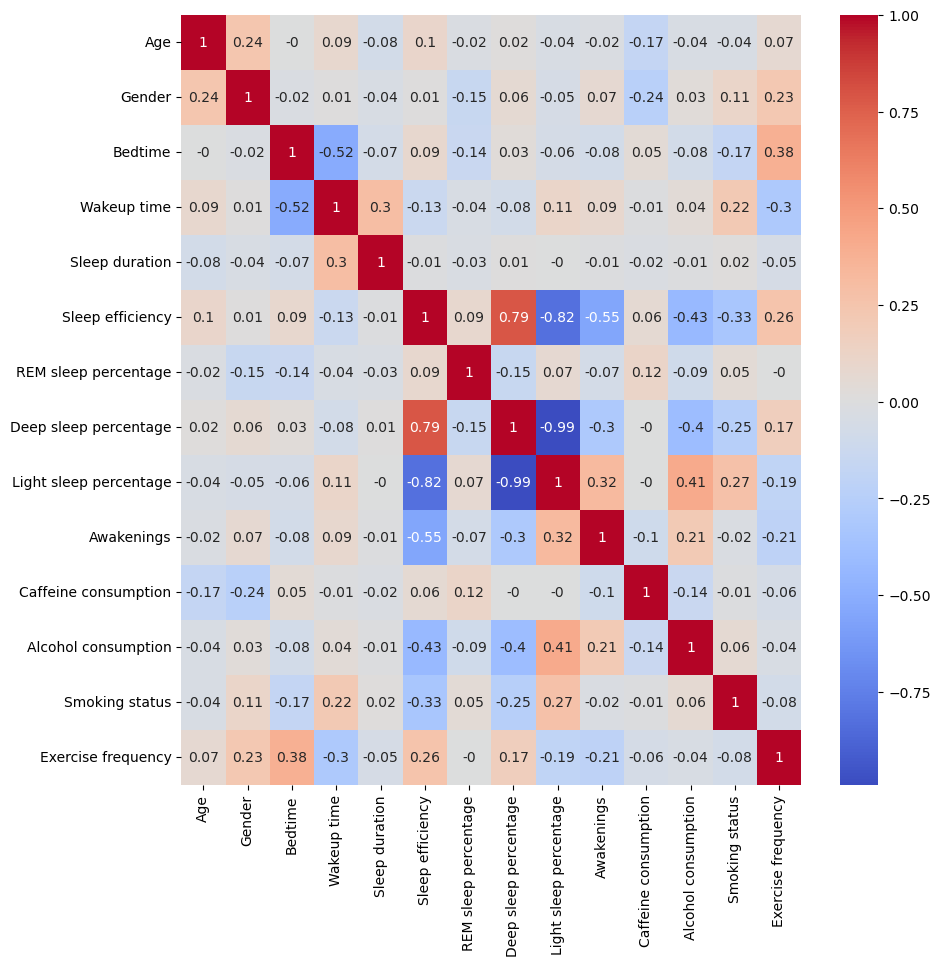

In [33]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr.round(2), annot=True, cmap='coolwarm')
plt.show()